In [1]:

# Import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc, precision_recall_curve
# Sharpley value
import shap
import lime
import lime.lime_tabular

#model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from xgboost import  XGBClassifier
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
# stepwise
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# perform
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# under-sample
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN

# statics
import scipy.stats as st
import torch

import random 

random.seed(10)


In [2]:
df = pd.read_csv("./Final_df.csv")
df.head(5)

,Unnamed: 0,limit_bal,sex,age,pay_Sep,pay_Aug,pay_Jul,pay_Jun,pay_May,pay_Apr,...,pay_amt_May,pay_amt_Apr,IsDefaulter,Payement_Value,Dues,education_graduate school,education_high school,education_university,marriage_married,marriage_single
0,0,20000,0,24,2,2,-1,-1,-2,-2,...,0,0,1,-2,3913,0,0,1,1,0
1,1,120000,0,26,-1,2,0,0,0,2,...,0,2000,1,3,10352,0,0,1,0,1
2,2,90000,0,34,0,0,0,0,0,0,...,1000,5000,0,0,76608,0,0,1,0,1
3,3,50000,0,37,0,0,0,0,0,0,...,1069,1000,0,0,174713,0,0,1,1,0
4,4,50000,1,57,-1,0,-1,0,0,0,...,689,679,0,-2,44620,0,0,1,1,0


In [3]:
X = df.drop(['IsDefaulter','Payement_Value','Dues','Unnamed: 0'],axis=1)
y = df['IsDefaulter']

In [4]:
# change the the features' types as categorical variables
X.iloc[:,21:26]=X.iloc[:,21:26].astype('category')
X.iloc[:,3:9]=X.iloc[:,3:9].astype('category')
X.iloc[:,1]=X.iloc[:,1].astype('category')

In [6]:
# normalize the numerical features
num_d = X.select_dtypes(exclude=['category'])
scaler = StandardScaler()
X[num_d.columns] = scaler.fit_transform(num_d)

In [8]:
X

,limit_bal,sex,age,pay_Sep,pay_Aug,pay_Jul,pay_Jun,pay_May,pay_Apr,bill_amt_Sep,...,pay_amt_Aug,pay_amt_Jul,pay_amt_Jun,pay_amt_May,pay_amt_Apr,education_graduate school,education_high school,education_university,marriage_married,marriage_single
0,-1.136720,0,-1.246020,2,2,-1,-1,-2,-2,-0.642501,...,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,0,0,1,1,0
1,-0.365981,0,-1.029047,-1,2,0,0,0,2,-0.659219,...,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,0,0,1,0,1
2,-0.597202,0,-0.161156,0,0,0,0,0,0,-0.298560,...,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0,0,1,0,1
3,-0.905498,0,0.164303,0,0,0,0,0,0,-0.057491,...,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0,0,1,1,0
4,-0.905498,1,2.334029,-1,0,-1,0,0,0,-0.578618,...,1.335034,0.271165,0.266434,-0.269039,-0.255187,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,1,0.381275,0,0,0,0,0,0,1.870379,...,0.611048,-0.012648,-0.113564,0.013131,-0.237130,0,1,0,1,0
29996,-0.134759,1,0.815221,-1,-1,-1,-1,0,0,-0.672786,...,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,0,1,0,0,1
29997,-1.059646,1,0.164303,4,3,2,-1,0,0,-0.647227,...,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,0,0,1,0,1
29998,-0.674276,1,0.598248,1,-1,0,0,0,-1,-0.717982,...,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,0,1,0,1,0


## Models and performance

In [4]:
# split the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [6]:
# Oversampling and undersampling the training dataset
X_train, y_train = SMOTE(sampling_strategy=0.5,random_state=9).fit_resample(X_train, y_train)
rus = RandomUnderSampler(random_state=3,sampling_strategy=0.7)
X_train, y_train = rus.fit_resample(X_train, y_train)
na_train=X_train.loc[X_train.isnull().any(axis=1)].index#remove the columns cotain NA
X_train=X_train.drop(na_train)
y_train=y_train.drop(na_train)

In [12]:
#save the training and testing datasets
X_test.to_csv('./X_test.csv')
X_train.to_csv('./X_train.csv')

In [12]:
#logistic regression
logreg_sk =  LogisticRegression(solver='newton-cg' ,class_weight='balanced') 
logreg_sk.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [14]:
# Get the predicted classes
logit_train_class_preds = logreg_sk.predict(X_train)
logit_test_class_preds = logreg_sk.predict(X_test)

In [43]:
# Get the predicted proba
logit_train_proba_preds = logreg_sk.predict_proba(X_train)[::,1]
logit_test_proba_preds = logreg_sk.predict_proba(X_test)[::,1]

(array([ 309.,  950., 1844., 2754., 3528., 3671., 1184., 1705.,  845.,
         130.]),
 array([9.69784398e-17, 9.96250800e-02, 1.99250160e-01, 2.98875240e-01,
        3.98500320e-01, 4.98125400e-01, 5.97750480e-01, 6.97375560e-01,
        7.97000640e-01, 8.96625720e-01, 9.96250800e-01]),
 <BarContainer object of 10 artists>)

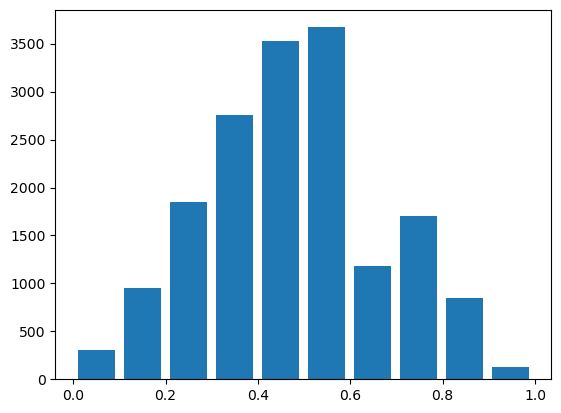

In [23]:
# histograms of logistic regression predicted default probabilities
plt.hist(logit_train_proba_preds,10,histtype='barstacked', rwidth=0.8)

In [16]:
# Get the accuracy scores
train_accuracy_logit = accuracy_score(logit_train_class_preds,y_train)
test_accuracy_logit= accuracy_score(logit_test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_logit)
print("The accuracy on test data is ", test_accuracy_logit)

The accuracy on train data is  0.6722813238770685
The accuracy on test data is  0.6677777777777778


In [16]:
test_accuracy_logit = accuracy_score(logit_test_class_preds,y_test)
test_precision_score_logit = precision_score(logit_test_class_preds,y_test)
test_recall_score_logit = recall_score(logit_test_class_preds,y_test)
test_f1_score_logit = f1_score(logit_test_class_preds,y_test)
test_roc_score_logit = roc_auc_score(logit_test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_logit)
print("The precision on test data is ", test_precision_score_logit)
print("The recall on test data is ", test_recall_score_logit)
print("The f1 on test data is ", test_f1_score_logit)
print("The roc_score on test data is ", test_roc_score_logit)

The accuracy on test data is  0.6677777777777778
The precision on test data is  0.6593607305936073
The recall on test data is  0.36217707549535993
The f1 on test data is  0.4675408774485996
The roc_score on test data is  0.618007191561311


In [17]:
#Random forest
#Gride search for the best set of hyper-parameters
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}
grid_rf_clf = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid, scoring = 'recall', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='recall', verbose=3)

In [19]:
#choose the optimal model
optimal_rf_clf = grid_rf_clf.best_estimator_

In [24]:
# Get the predicted proba
rf_train_proba_preds =optimal_rf_clf.predict_proba(X_train)[::,1]
rf_test_proba_preds = optimal_rf_clf.predict_proba(X_test)[::,1]

In [25]:
# Get the predicted classes
rf_train_class_preds = optimal_rf_clf.predict(X_train)
rf_test_class_preds = optimal_rf_clf.predict(X_test)

(array([1097., 2856., 2737., 2884., 2219., 1244.,  938.,  698., 1144.,
        1103.]),
 array([0.07033657, 0.15953484, 0.24873312, 0.33793139, 0.42712966,
        0.51632793, 0.60552621, 0.69472448, 0.78392275, 0.87312102,
        0.9623193 ]),
 <BarContainer object of 10 artists>)

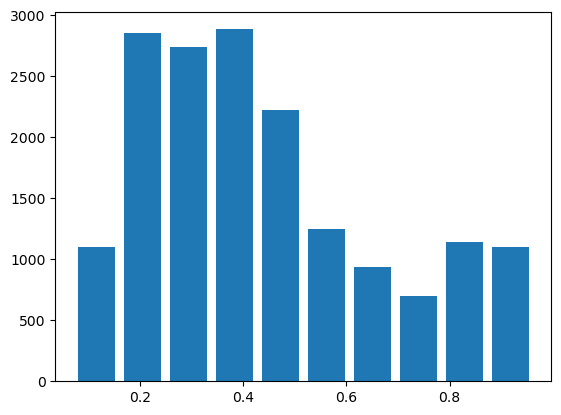

In [29]:
# histograms of logistic regression predicted default probabilities
plt.hist(rf_train_proba_preds,10,histtype='barstacked', rwidth=0.8)

In [26]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(rf_train_class_preds,y_train)
test_accuracy_rf = accuracy_score(rf_test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.8152482269503546
The accuracy on test data is  0.7686868686868686


In [27]:
test_accuracy_rf = accuracy_score(rf_test_class_preds,y_test)
test_precision_score_rf = precision_score(rf_test_class_preds,y_test)
test_recall_score_rf = recall_score(rf_test_class_preds,y_test)
test_f1_score_rf = f1_score(rf_test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(rf_test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.7686868686868686
The precision on test data is  0.5780821917808219
The recall on test data is  0.4810030395136778
The f1 on test data is  0.5250933222729157
The roc_score on test data is  0.6769352016500696


In [30]:
#XGBoosting
xgb_train=X_train.copy()
xgb_train.iloc[:,21:26]=xgb_train.iloc[:,21:26].astype('int64')
xgb_train.iloc[:,3:9]=xgb_train.iloc[:,3:9].astype('int64')
xgb_train.iloc[:,1]=xgb_train.iloc[:,1].astype('int64')

In [31]:
xgb_test = X_test.copy()
xgb_test.iloc[:,21:26]=xgb_test.iloc[:,21:26].astype('int64')
xgb_test.iloc[:,3:9]=xgb_test.iloc[:,3:9].astype('int64')
xgb_test.iloc[:,1]=xgb_test.iloc[:,1].astype('int64')

In [26]:
# Grid search
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(3,10,1),
 'n_estimators':range(120,160,10)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, n_estimators=100, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,class_weight='balanced'), 
 param_grid = param_test1, scoring='recall',n_jobs=-1, cv=3, verbose = 2)


gsearch1.fit(xgb_train, y_train)

Fitting 3 folds for each of 112 candidates, totalling 336 fits
[19:28:49] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "class_weight" } are not used.



GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, class_weight='balanced',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                 

In [27]:
gsearch1.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=9, missing=nan, monotone_constraints=None,
              n_estimators=140, n_jobs=None, nthread=4, num_parallel_tree=None, ...)

In [28]:
#select the best model
optimal_xgb = gsearch1.best_estimator_

In [32]:
# Get the predicted proba
xgb_train_proba_preds = optimal_xgb.predict_proba(xgb_train)[::,1]
xgb_test_proba_preds = optimal_xgb.predict_proba(xgb_test)[::,1]

In [33]:
# Get the predicted classes
xgb_train_class_preds = optimal_xgb.predict(xgb_train)
xgb_test_class_preds = optimal_xgb.predict(xgb_test)

(array([2301., 3974., 3509., 2225., 1228.,  773.,  583.,  679., 1100.,
         548.]),
 array([0.14788005, 0.21679588, 0.2857117 , 0.35462755, 0.42354336,
        0.49245918, 0.561375  , 0.63029087, 0.6992067 , 0.7681225 ,
        0.83703834], dtype=float32),
 <BarContainer object of 10 artists>)

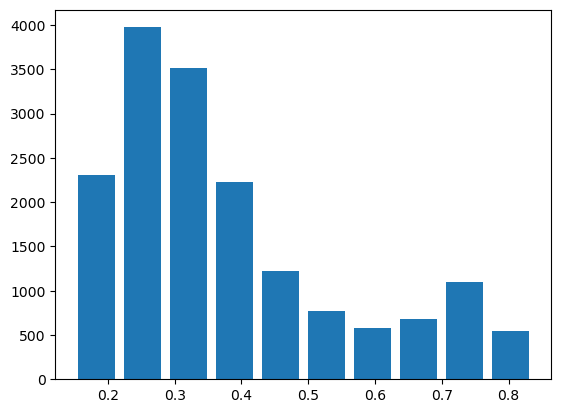

In [36]:
# histograms of logistic regression predicted default probabilities
plt.hist(xgb_train_proba_preds,10,histtype='barstacked', rwidth=0.8)

In [34]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(xgb_train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(xgb_test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)#???

The accuracy on train data is  0.7862293144208038
The accuracy on test data is  0.8118181818181818


In [35]:
test_accuracy_xgb_tuned = accuracy_score(xgb_test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(xgb_test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(xgb_test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(xgb_test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(xgb_test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  0.8118181818181818
The precision on test data is  0.43789954337899545
The recall on test data is  0.6027655562539284
The f1 on test data is  0.5072732081459932
The roc_score on train data is  0.727306475322776


In [33]:
# model comparison 
classifiers = ['Logistic Regression','Random Forest CLf', 'Xgboost Clf']
train_accuracy = [train_accuracy_logit, train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_logit, test_accuracy_rf, test_accuracy_xgb_tuned]
test_precision_score = [test_precision_score_logit, test_precision_score_rf, test_precision_xgb_tuned]
test_recall_score = [test_recall_score_logit, test_recall_score_rf, test_recall_score_xgb_tuned]
test_f1_score = [test_f1_score_logit, test_f1_score_rf, test_f1_score_xgb_tuned]

In [34]:
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': test_precision_score, 'Recall Score': test_recall_score, 'F1 Score': test_f1_score })

,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.672281,0.667778,0.659361,0.362177,0.467541
1,Random Forest CLf,0.815248,0.768687,0.578082,0.481003,0.525093
2,Xgboost Clf,0.786229,0.811818,0.437900,0.602766,0.507273


In [35]:
#AUC
classifiers_proba = [(logreg_sk,logit_test_proba_preds), 
               (optimal_rf_clf, rf_test_proba_preds), 
               (optimal_xgb, xgb_test_proba_preds)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','roc_auc','precision','recall'])




# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    precision, recall, _ = precision_recall_curve(y_test, pair[1])
    roc_auc = roc_auc_score(y_test, pair[1])
    pr_auc = auc(recall, precision)
    new_row = pd.DataFrame({ 'classifiers': pair[0].__class__.__name__, 'fpr': [fpr], 'tpr':[tpr], 'roc_auc':[roc_auc], 'precision':[precision], 'recall':[recall], 'pr_auc':[pr_auc] })
    result_table = pd.concat([result_table, new_row])
   # result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
    #                                    'fpr':fpr, 
     #                                   'tpr':tpr, 
      #                                  'auc':auc}, ignore_index=True)
    
    
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

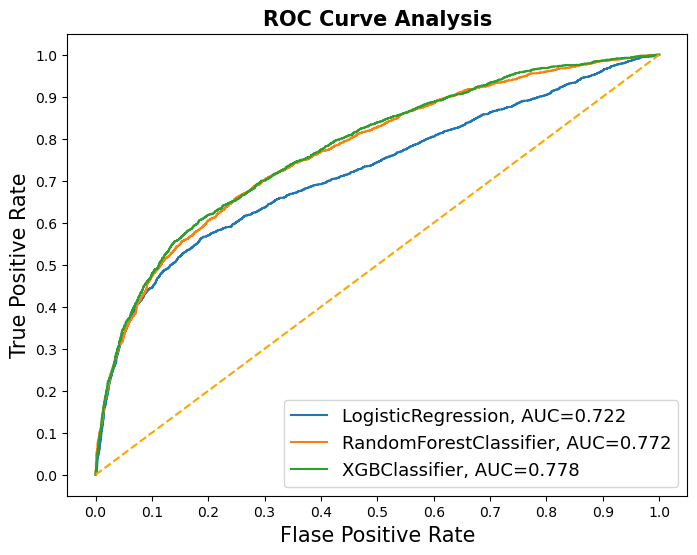

In [36]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['roc_auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

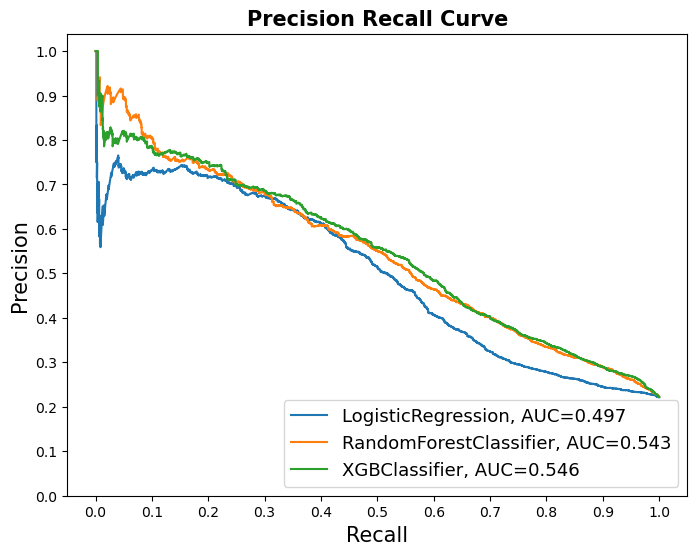

In [37]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['recall'], 
             result_table.loc[i]['precision'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['pr_auc']))
    

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=15)

plt.title('Precision Recall Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [62]:
#store the model
import pickle
filename1 = 'logistic_model.sav'
pickle.dump(logreg_sk, open(filename1, 'wb'))
filename2 = 'rf.sav'
pickle.dump(optimal_rf_clf, open(filename2, 'wb'))
filename3 = 'xgb.sav'
pickle.dump(optimal_xgb, open(filename3, 'wb'))